In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_palette("tab10")

In [2]:
bad_df = pd.read_csv('Results/metrics_bad_feature_engineering.csv')
bad_df['Quality of Feature Engineering'] = 'Bad'
good_df = pd.read_csv('Results/metrics_good_feature_engineering.csv')
good_df['Quality of Feature Engineering'] = 'Good'
df = pd.concat([bad_df, good_df])

In [3]:
#Pivot rmse, mae, mape and r-squared columns to row
df = pd.melt(df, id_vars=['model', 'Quality of Feature Engineering'], value_vars=['rmse', 'mae', 'mape', 'r-squared'], var_name='metric', value_name='value')
df['metric'] = df['metric'].str.replace('rmse', 'RMSE')
df['metric'] = df['metric'].str.replace('mae', 'MAE')
df['metric'] = df['metric'].str.replace('mape', 'MAPE')
df['metric'] = df['metric'].str.replace('r-squared', 'R-Squared')

#Change sarimax, xgboost, lstm and prophet to SARIMAX, XGBoost, LSTM and Prophet
df['model'] = df['model'].str.replace('sarimax', 'SARIMAX')
df['model'] = df['model'].str.replace('xgboost', 'XGBoost')
df['model'] = df['model'].str.replace('lstm', 'LSTM')
df['model'] = df['model'].str.replace('prophet', 'Prophet')

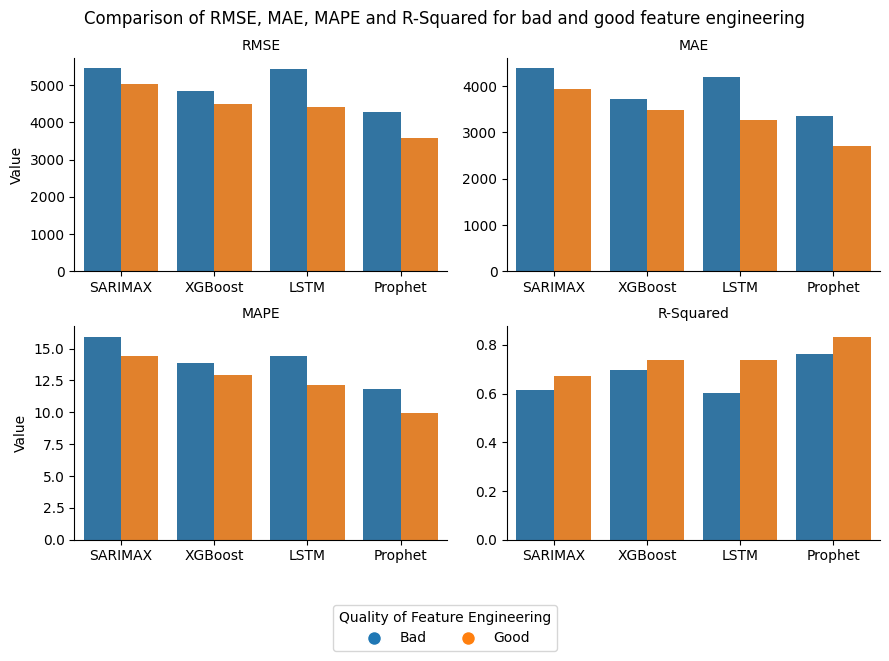

In [4]:
#Plot comparisoin of RMSE, MAE, MAPE and R-Squared for bad and good feature engineering
g = sns.catplot(data=df, x='model', y='value', hue='Quality of Feature Engineering', col='metric', kind='bar', height=3, aspect=1.5, sharey=False, col_wrap=2, legend=False, sharex=False)
g.set_axis_labels("", "Value")
g.set_titles("{col_name}")
plt.subplots_adjust(top=0.9)
g.figure.suptitle('Comparison of RMSE, MAE, MAPE and R-Squared for bad and good feature engineering')

colors = sns.color_palette("tab10")
metric_labels = df['Quality of Feature Engineering'].unique()
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=colors[i], markersize=10) for i in range(len(metric_labels))]

g.figure.legend(handles, metric_labels, loc='lower center', bbox_to_anchor=(0.5, -0.1), ncol=4, title='Quality of Feature Engineering')
plt.savefig('Plots/comparision_values.png', bbox_inches='tight', dpi=600)
plt.show()

- Good feature engineering has imporoved the performance of all models.

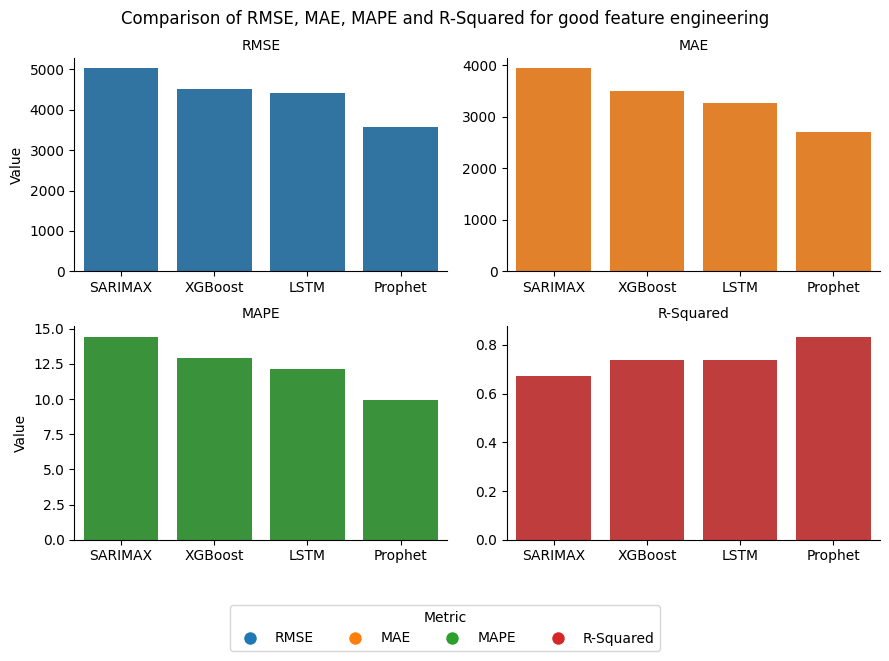

In [5]:
fig_df = df[df['Quality of Feature Engineering'] == 'Good']
#Plot comparisoin of RMSE, MAE, MAPE and R-Squared for good feature engineering
g = sns.catplot(data=fig_df, x='model', y='value', col='metric', kind='bar', height=3, aspect=1.5, sharey=False, col_wrap=2, legend=False, sharex=False, hue='metric')
g.set_axis_labels("", "Value")
g.set_titles("{col_name}")
plt.subplots_adjust(top=0.9)
g.figure.suptitle('Comparison of RMSE, MAE, MAPE and R-Squared for good feature engineering')
metric_labels = fig_df['metric'].unique()
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=colors[i], markersize=10) for i in range(len(metric_labels))]
g.figure.legend(handles, metric_labels, loc='lower center', bbox_to_anchor=(0.5, -0.1), ncol=4, title='Metric')
plt.savefig('Plots/comparision_values_good.png', bbox_inches='tight', dpi=600)
plt.show()


- The best model is Prophet. It has the lowest RMSE, MAE, MAPE and the highest R2 score.

In [6]:
#calcualte change in percentage between bad and good feature engineering for each metric
df['change'] = df.groupby(['metric', 'model'])['value'].pct_change()*100
df = df.dropna()

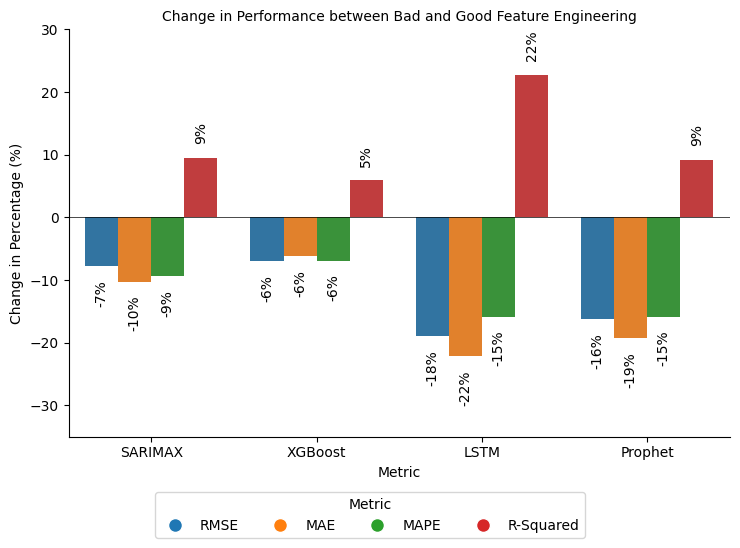

In [7]:
#Plot the change in percentage between bad and good feature engineering for each metric
g = sns.catplot(x='model', y='change', hue='metric', col='Quality of Feature Engineering', data=df, kind='bar', legend=False, height=5, aspect=1.5, sharey=False)
g.set_axis_labels('Metric', 'Change in Percentage (%)')
g.set_titles('Change in Performance between Bad and Good Feature Engineering')
g.set(ylim=(-35, 30))
plt.axhline(0, color='black', linewidth=0.5)

for ax in g.axes.flat:
    for container in ax.containers:
        ax.bar_label(container, fmt='%d%%', padding=10, rotation=90)

colors = sns.color_palette("tab10")
metric_labels = df['metric'].unique()
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=colors[i], markersize=10) for i in range(len(metric_labels))]

g.figure.legend(handles, metric_labels, loc='lower center', bbox_to_anchor=(0.5, -0.1), ncol=4, title='Metric')

plt.tight_layout()
plt.savefig('Plots/comparision_percentage.png', bbox_inches='tight', dpi=600)
plt.show()

- The highest impact of good feature engineering is on the LSTM model followed by Prophet. The RMSE, MAE, MAPE and R-squared score have improved significantly.